### Função para criação de grafo de Coautoria

In [ ]:
import networkx as nx
import pandas as pd

def create_graph(dataframe):

    graph = nx.Graph()

    for index, row in dataframe.iterrows():
        # Converte a string de autores em um conjunto para facilitar a verificação de existência
        authors = set(row["Authors"].split(";"))

        # Adiciona cada autor como nó no grafo, se ainda não estiver presente
        for author in authors:
            if not graph.has_node(author):
                graph.add_node(author)

        # Cria arestas entre todos os pares de autores, sem repetir arestas
        for i, author1 in enumerate(authors):
            for author2 in authors - {author1}:  # Subtrai o próprio autor do conjunto para evitar autoloops
                if not graph.has_edge(author1, author2):
                    graph.add_edge(author1, author2)

    return graph


###Função para calcular assortatividade de Grau

In [ ]:
def calculate_degree_assortativity(graph):

    assortativity = nx.degree_assortativity_coefficient(graph)
    return assortativity

###Função para plotar a assortatividade de Grau

In [ ]:
import seaborn as sns

def plot_degree_assortativity(graph, title, ax):

    degree = dict(graph.degree())
    x = []
    y = []

    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        if len(neighbors) > 0:
            avg_neighbor_degree = sum(degree[neighbor] for neighbor in neighbors) / len(neighbors)
            x.append(degree[node])
            y.append(avg_neighbor_degree)

    sns.regplot(x=x, y=y, scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'}, ax=ax)
    ax.set_xlabel('Node Degree')
    ax.set_ylabel('Average Neighbor Degree')
    assortativity = calculate_degree_assortativity(graph)
    ax.set_title(f'Assortatividade de Grau ({title}): {assortativity:.4f}')
    ax.grid(True)


###Carregar os dados dos arquivos CSV e criar os grafos:


In [ ]:
ods_files = ['ods1.csv', 'ods2.csv', 'ods3.csv', 'ods4.csv']
dataframes = []
graphs = []

for file in ods_files:
    df = pd.read_csv(file)
    dataframes.append(df)
    graph = create_graph(df)
    graphs.append(graph)

###Criar os gráficos de dispersão e organizar em um layout de grid


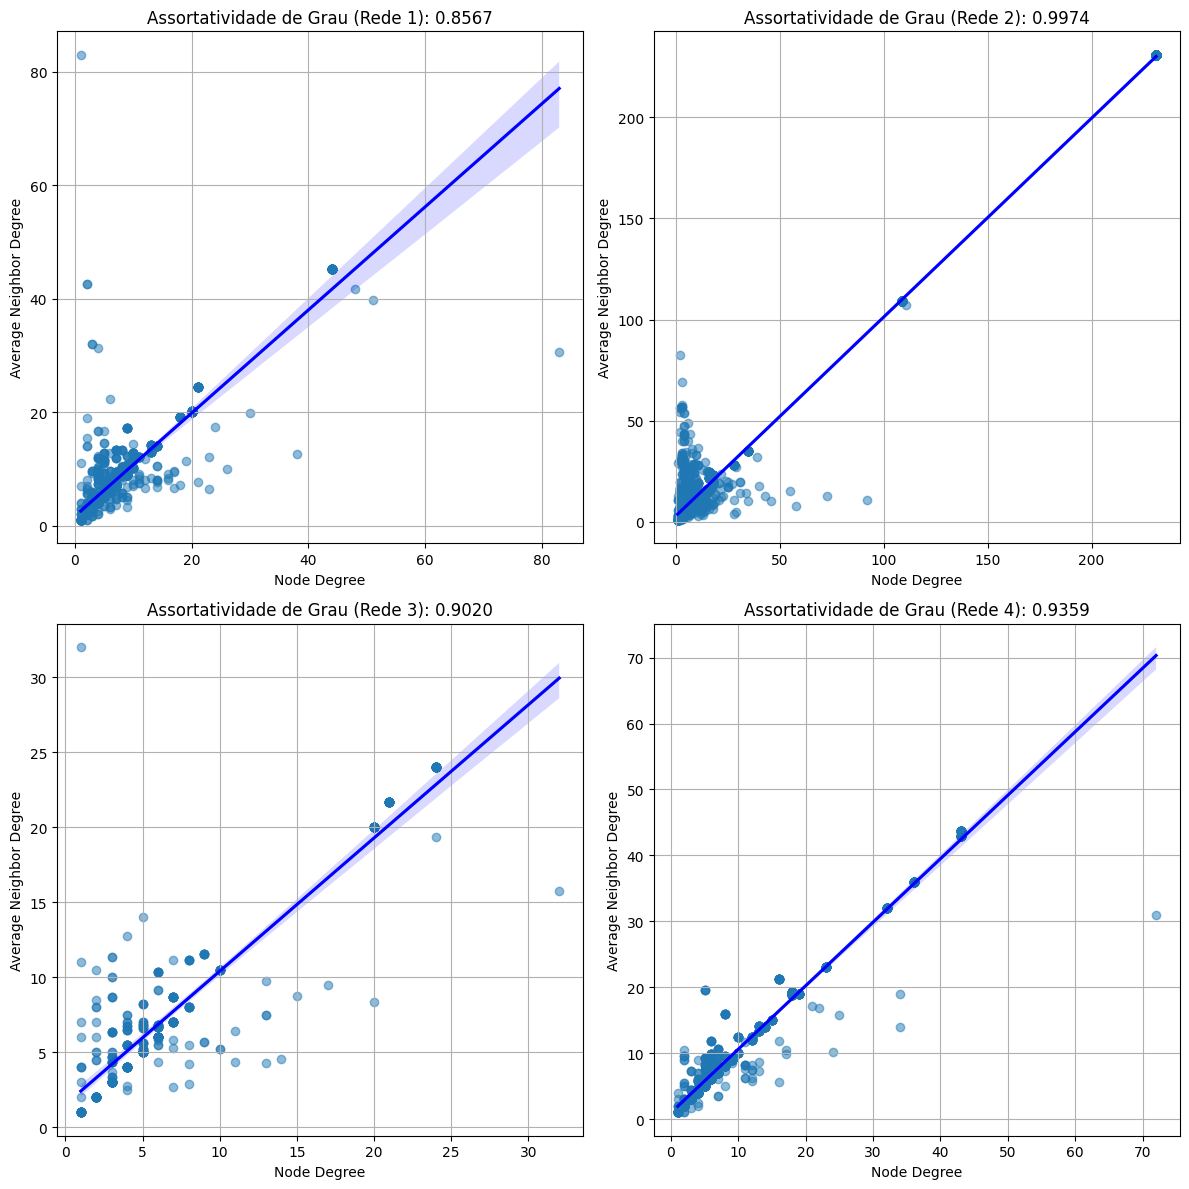

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 12))
gs = GridSpec(2, 2, figure=fig)

for i, graph in enumerate(graphs):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    plot_degree_assortativity(graph, f'Rede {i+1}', ax)

plt.tight_layout()
plt.savefig('grid_layout.png')
plt.show()
